# TASK 2 :ds

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Load the Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

### Data Overview

In [3]:
print("Train Dataset Info")
print(train_df.info())
print("\nTest Dataset Info")
print(test_df.info())
print("\nGender Submission Dataset Info")
print(gender_submission_df.info())

Train Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

### # Display the first few rows of each dataset

In [4]:
print("\nTrain Dataset Head")
print(train_df.head())
print("\nTest Dataset Head")
print(test_df.head())
print("\nGender Submission Dataset Head")
print(gender_submission_df.head())


Train Dataset Head
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

### Data Cleaning

In [6]:
# Handling missing values in the train dataset
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')

In [7]:
# Handling missing values in the test dataset
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Cabin'] = test_df['Cabin'].fillna('Unknown')

In [8]:
# Confirm no missing values remain
print("\nMissing Values in Train Dataset")
print(train_df.isnull().sum())
print("\nMissing Values in Test Dataset")
print(test_df.isnull().sum())


Missing Values in Train Dataset
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Missing Values in Test Dataset
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Exploratory Data Analysis (EDA)

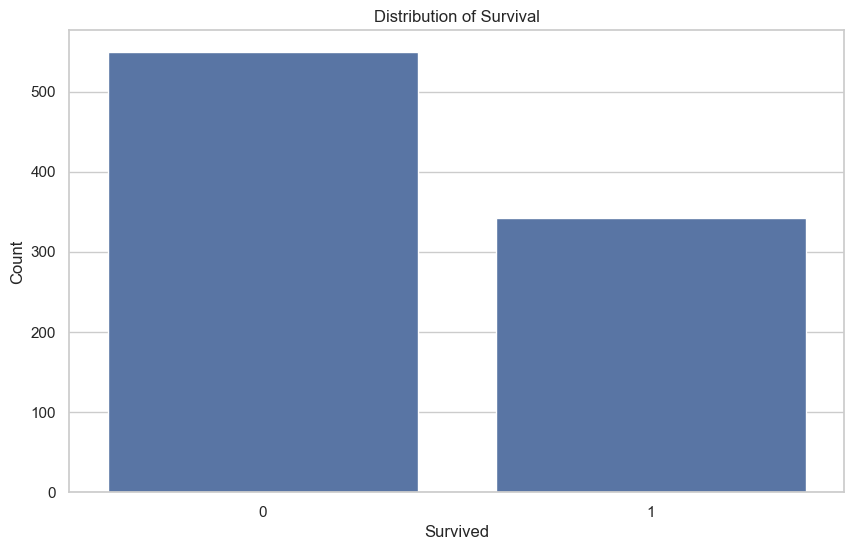

In [9]:
# Distribution of survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

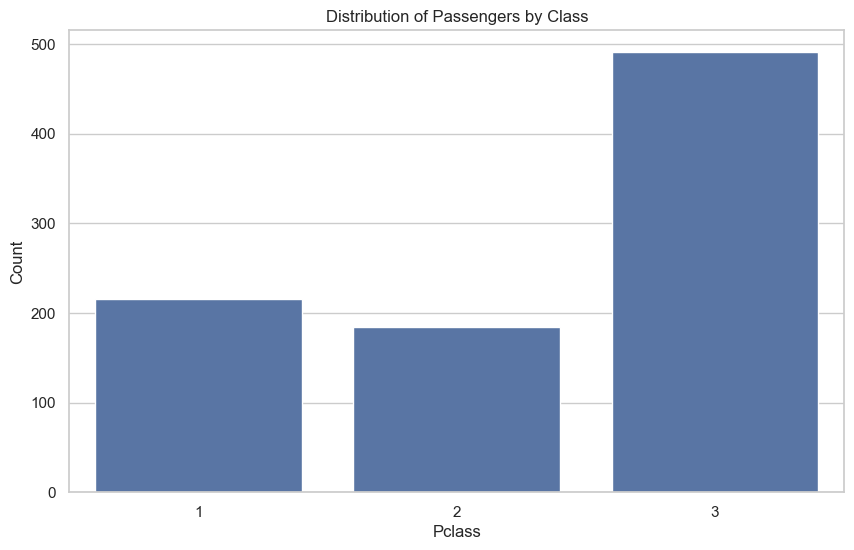

In [10]:
# Distribution of passengers by class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=train_df)
plt.title('Distribution of Passengers by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

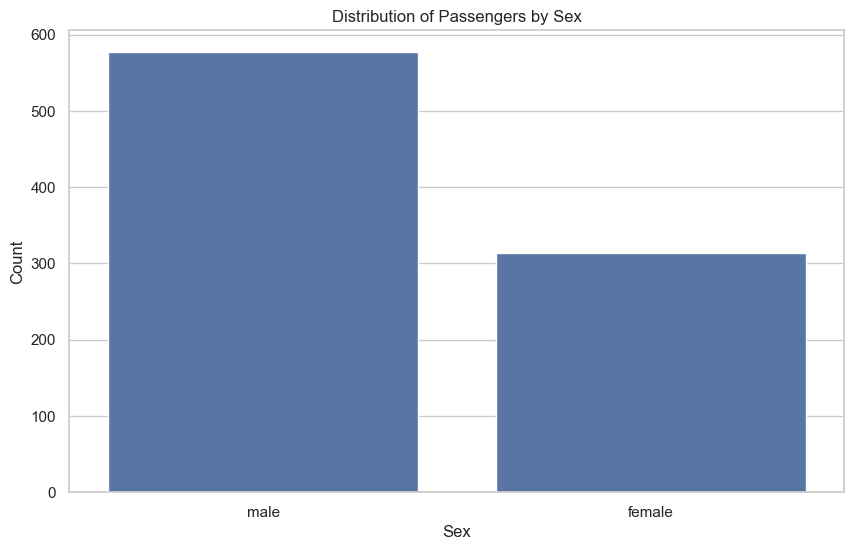

In [11]:
# Distribution of passengers by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train_df)
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

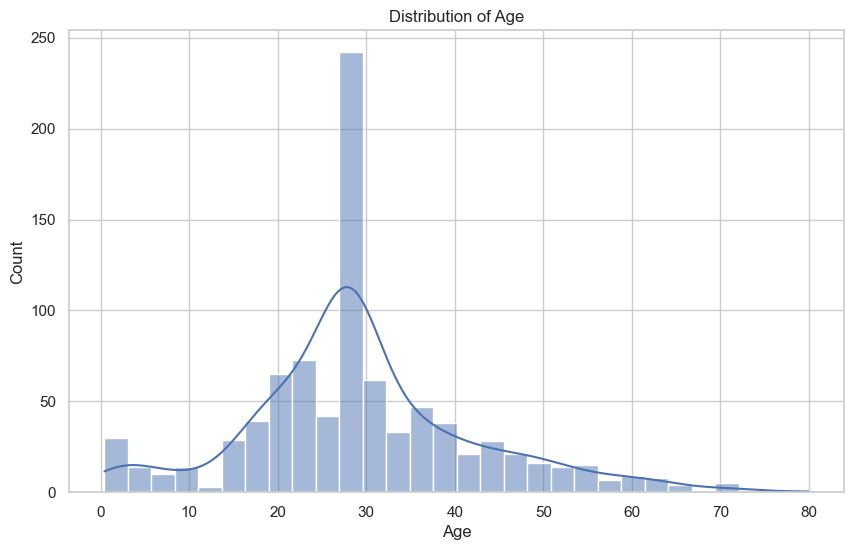

In [12]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Analyzing Survival by Different Factors

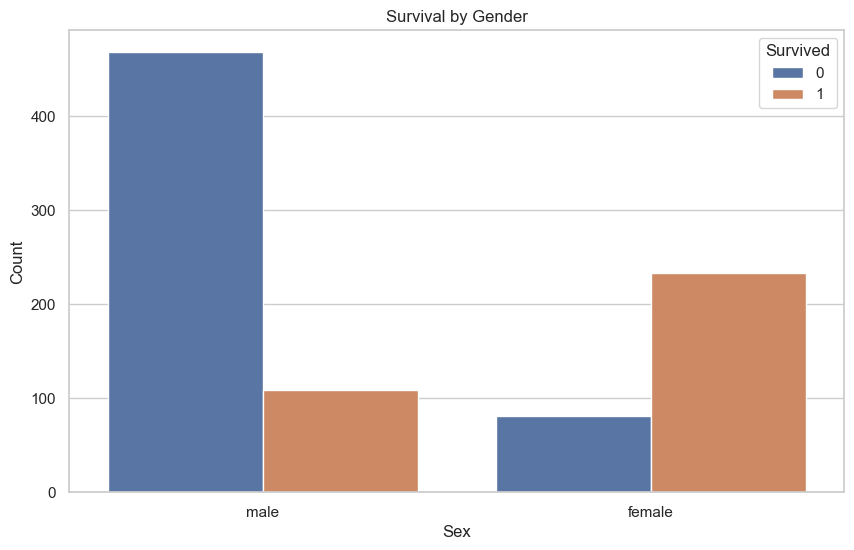

In [13]:
# Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

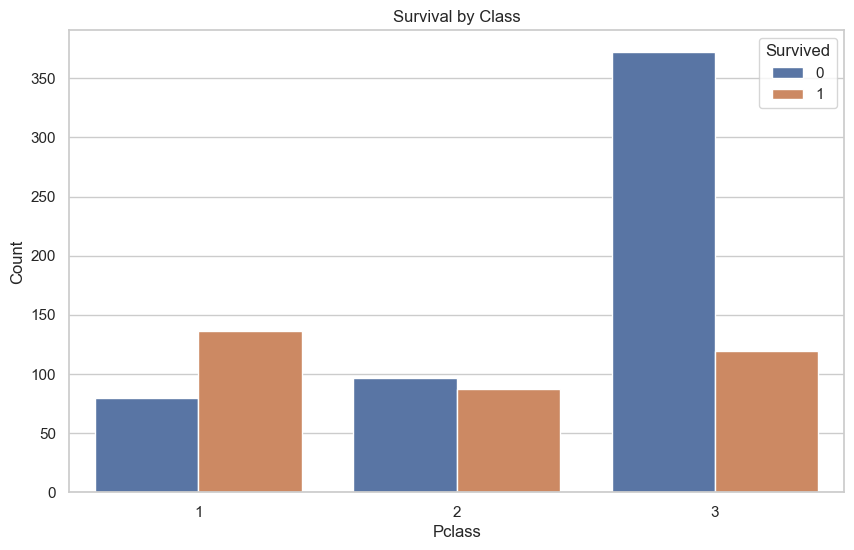

In [14]:
# Survival by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

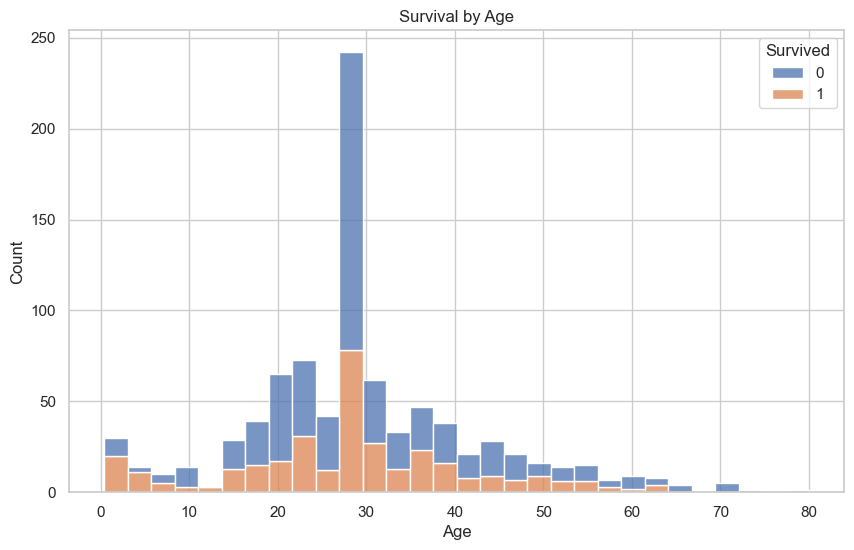

In [15]:
# Survival by Age
plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()